## Import necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

## Import dataset

In [2]:
# Importing the csv file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

# Checking the top five rows
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The dataset contains the both numerical and categorical data are present. Here, "Happiness Score" is target variable which contains continous value. So, it will be termed as "Regression problem".

In [3]:
# Checking some random rows
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
26,Chile,Latin America and Caribbean,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
30,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
134,Egypt,Middle East and Northern Africa,135,4.194,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395


In [4]:
# Checking the dimension of the dataset
df.shape

(158, 12)

This dataset contains 158 rows and 12 columns. Out of which 1 is target vairbale and remaning 11 are features variables.

In [5]:
# Checking the columns of the dataset into list format
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [6]:
# Checking the datatypes of the columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We observe 1 columns has int64,1 columns has object and all other are float64

In [7]:
# Checking missing values 
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

As we can see there are no null values are present in this dataset.

In [8]:
# Checking the dulicates values
df.duplicated().sum()

0

As we can see there are no duplicates values.

In [9]:
# To get the good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This gives the brief about the dataset which includes indexing type, columns type, no null values and memory usage.

In [10]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

There are the value counts of all columns.

In [11]:
# Checking the unique values of each column
df.nunique().to_frame("No. of unique value of each column")

,No. of unique value of each column
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


### Description of Dataset

In [12]:
# Statistical summary of numerical columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the statistical information of the numerical columns.

From the above description we can observe the following :-
    
   1. The counts of all the columns are same which means there are no missing values in the dataset.
   2. The mean values is greater than the median (50%) in Standard Error,Trust,Generosity columns     which means the data is skewed to right in these column.
   3. The mean values is less than the median (50%) in Economy,Family,Health,Freedom,Dystopia Residual     columns which means the data is skewed to left in these columns.
   4. we can observe Standard Error,Generosity is a huge differene between 75% anmax hence ther are outliers present in the data.
   5. We can also notice the Standard deviation, min 25%, percentile values from this describe method.

**From Description we can see that for some countries min values are 0. so let try to find country at bottom in respective category.**

In [13]:
# Checking the rows which GDP is zero
df.loc[df["Economy (GDP per Capita)"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [14]:
# Checking the rows which Family is zero
df.loc[df["Family"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [15]:
# Checking the rows which Line Expectancy is zero
df.loc[df["Health (Life Expectancy)"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [16]:
# Checking the rows which Freedom is zero
df.loc[df["Freedom"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [17]:
# Checking the rows which Corruption is zero
df.loc[df["Trust (Government Corruption)"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [18]:
# Checking the rows which Generosity is zero
df.loc[df["Generosity"] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


### Minimum Performance category wise
 1. Economy (GDP per Capita)        - Congo (Kinshasa)
 4. Family                          - Central African Republic
 2. Health (Life Expectancy)        - Sierra Leone 
 3. Freedom                         - Iraq
 5. Trust (Government Corruption)   - Indonesia
 6. Generosity                      - Greece

 Country,Region,Happiness Rank these factors are not contribute in evaluating the happiness in each country. So, we can remove those columns.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

That better all columns has float64 so we do use any encoding techneques.

## Top 10 countries happiest countries based on Happiness rank/score

In [20]:
Top = df.sort_values(by='Happiness Score', ascending= False).head(10)
Top

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


**We can see that Switzerland Top the chart with Happiness score of 7.587. We can see that 8 countries out of 10 are from Western Europe**

## Bottom 10 countries happiest countries based on Happiness rank/score

In [21]:
Bottom = df.sort_values(by='Happiness Score',ascending=False).head(10)
Bottom

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


**We can see that Chad from Sub-Saharan Africa. Top the chart with Happiness score of 7.587. We can see that 8 countries out of Bottom 10 are from Sub-Saharan Africa.**

In [22]:
# Visualization of Regionwise
df['Region'].value_counts().to_frame()

,count
Region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2


The regionwise Sub-Saharan Africa has maximum country and Australia and New Zealand minimum

## Description of the  regionwise

In [23]:
# Statistical summary of Regionwise
df.groupby('Region')['Happiness Score'].describe().sort_values(by='mean',ascending=True)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


We can see REGIONWISE that "Australia and New Zealand" has maximum Happiness Score(7.2850) and "Sub-Saharan Africa" has minimum Happiness Score(4.2028).

In [24]:
# Remove unused columns
df = df.drop(columns=['Country','Region','Happiness Rank'],axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Country,Region,Happiness Rank these factors are not contribute in evaluating the happiness in each country. and also not Help in EDA. So, we can remove those columns.

## Data Visualizatoin

### Univariate Analysis

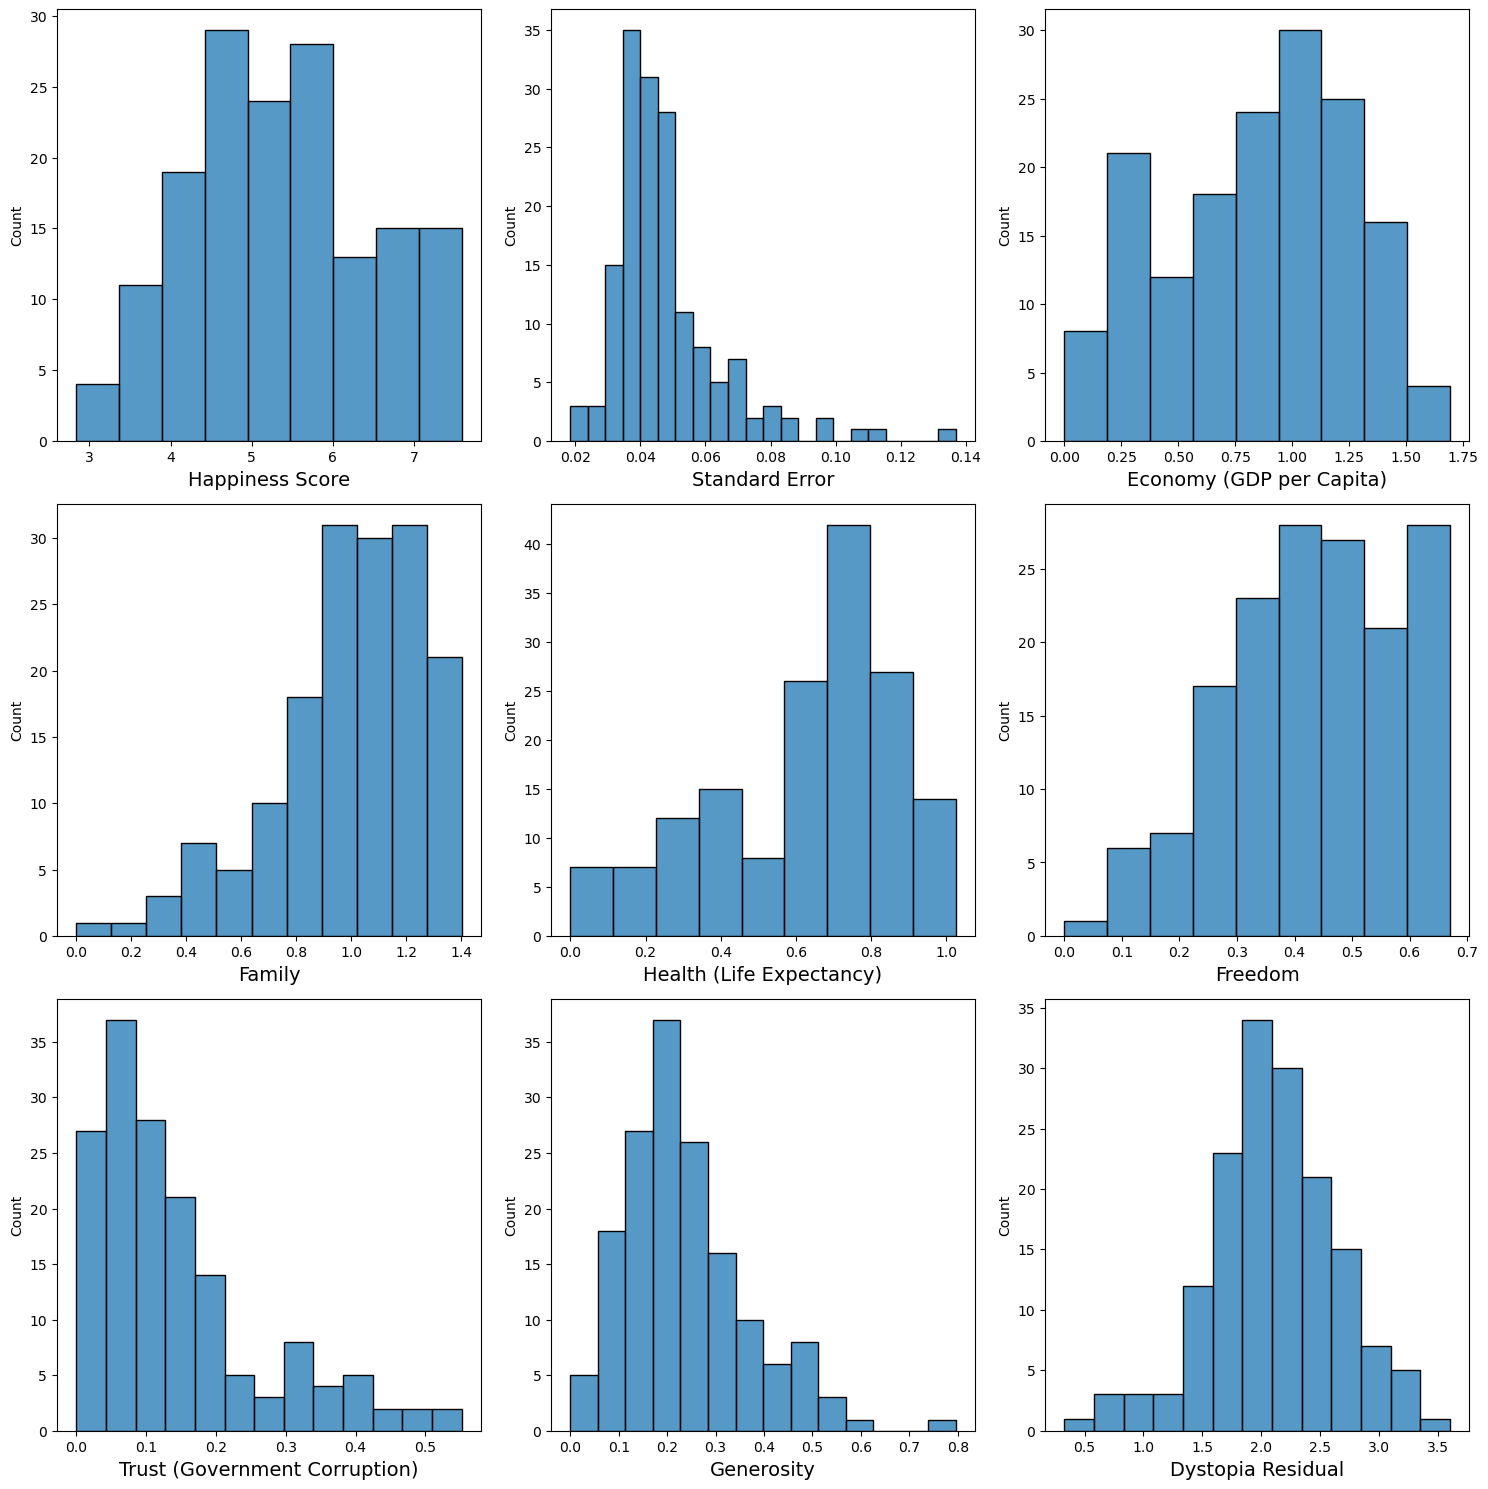

In [25]:
# Visualize using histplot
plt.figure(figsize=(15,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

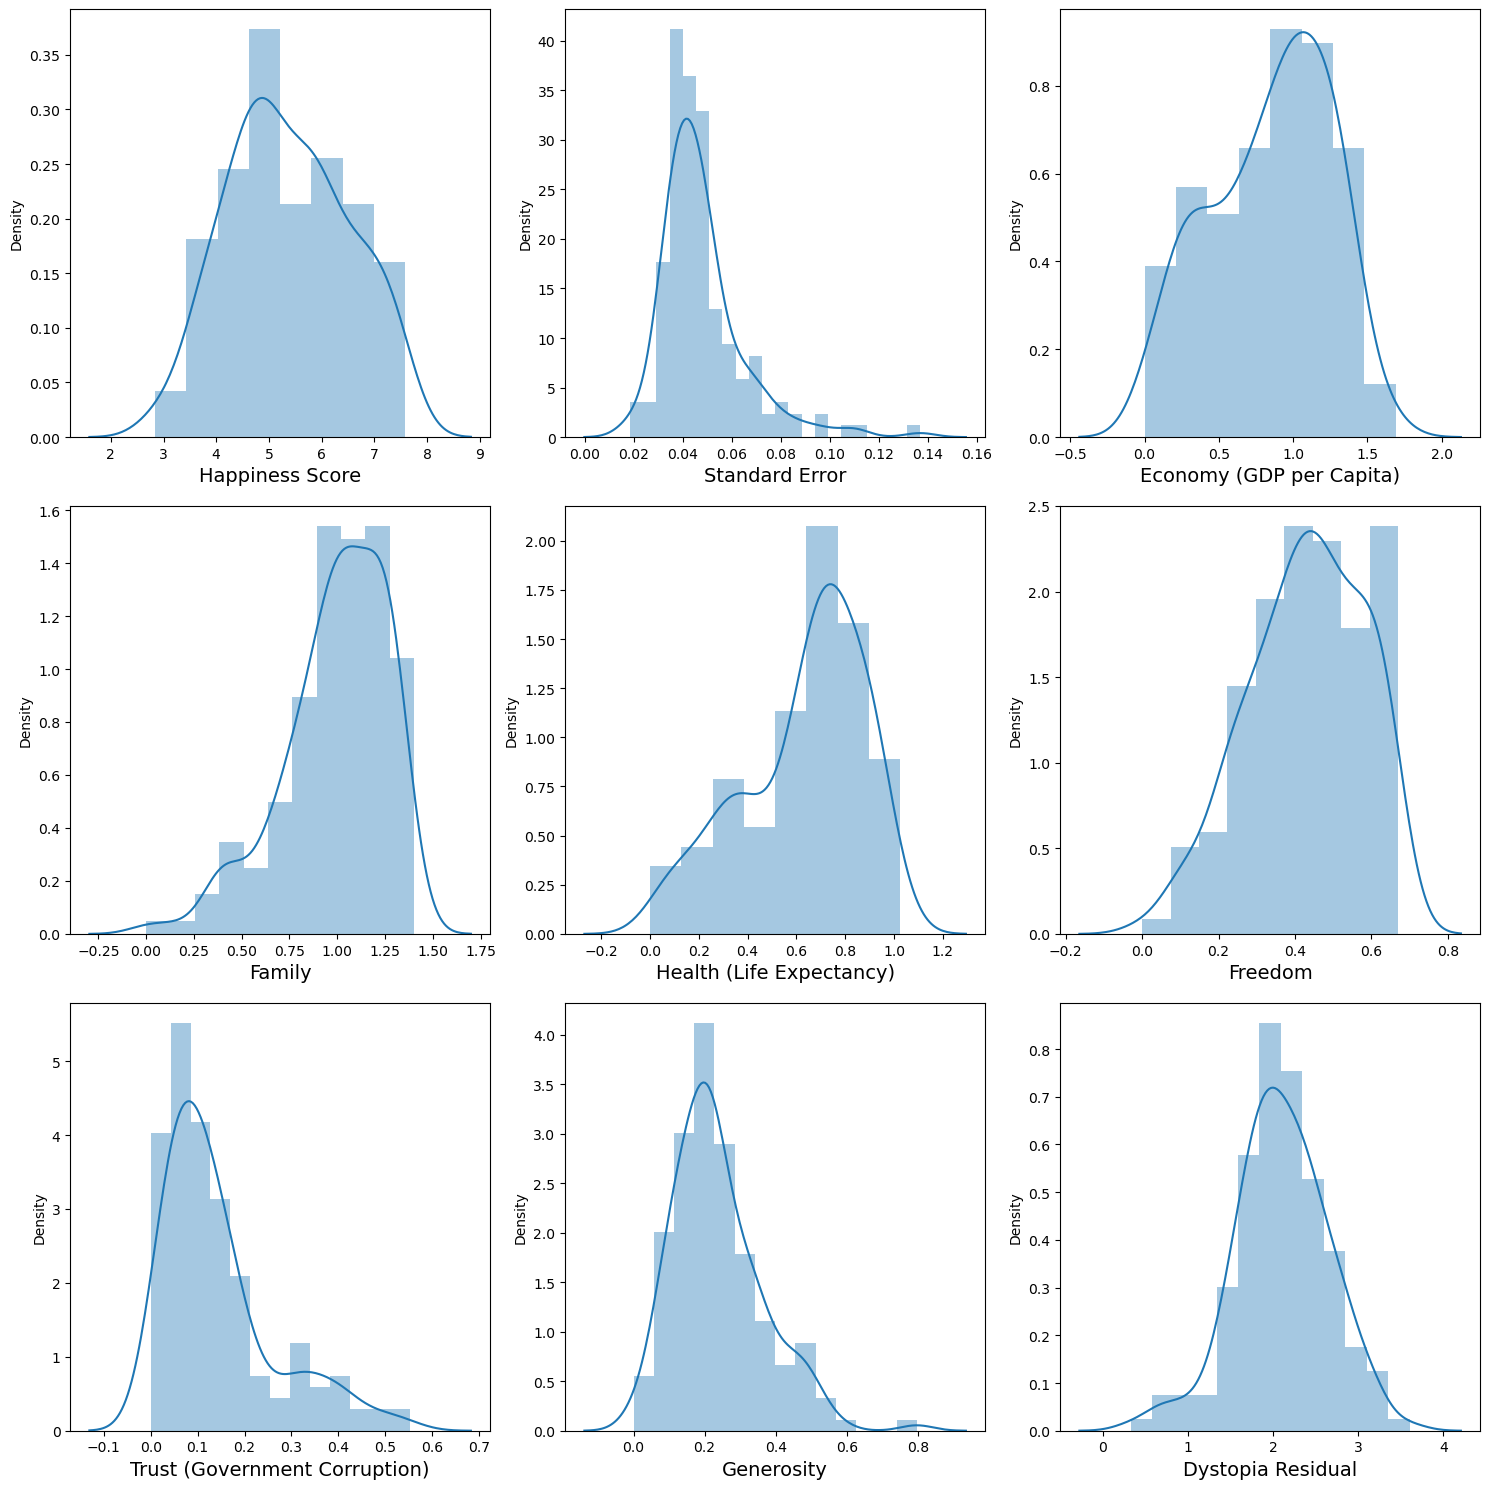

In [26]:
# Let's check how the data has been distributed in numerical columns
plt.figure(figsize=(15,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

From the above distribution plots we can observe that the some columns has skewness. 

### Bivariate Analysis

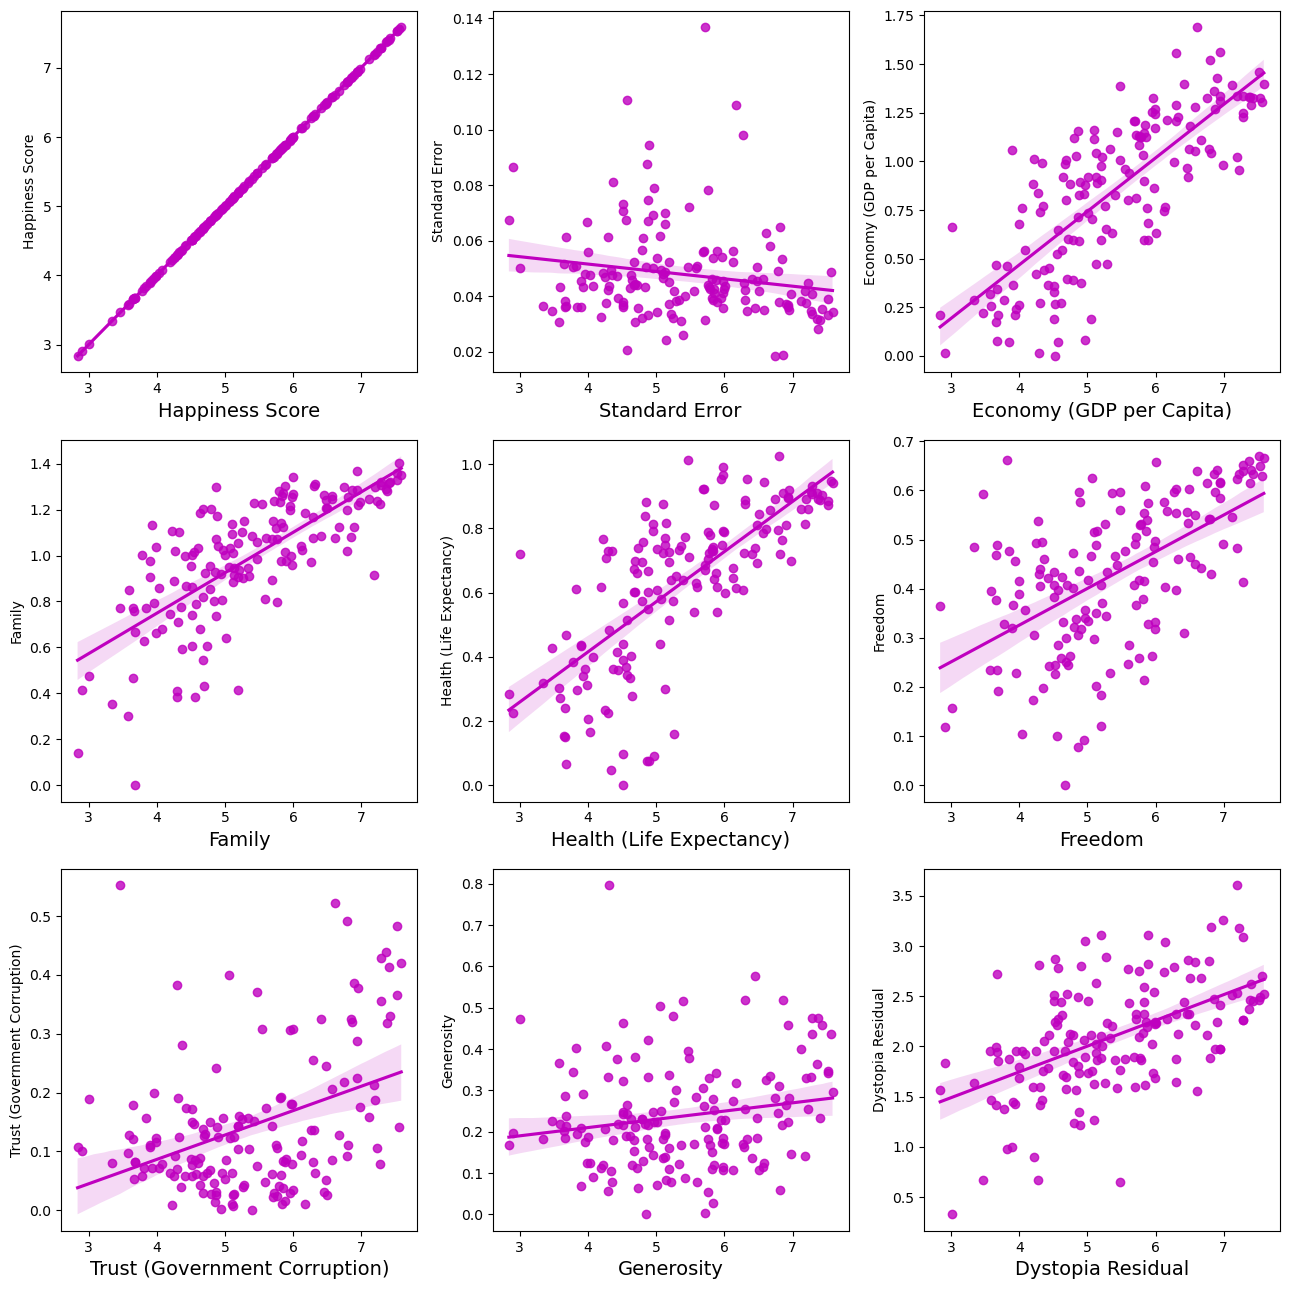

In [27]:
# Let's visualize the relation ship between features variable vs target variable using lmplot
plt.figure(figsize=(13,13), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot(x='Happiness Score',y=df[column],data=df,color='m')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can observer that GDP per Capita, Family, Life Expectancy, Freedom,Dystopia Residual has Postive relationship with target variables.
and Standard Error,Generosity,Government Corruption has week relationship lot of data has spread.

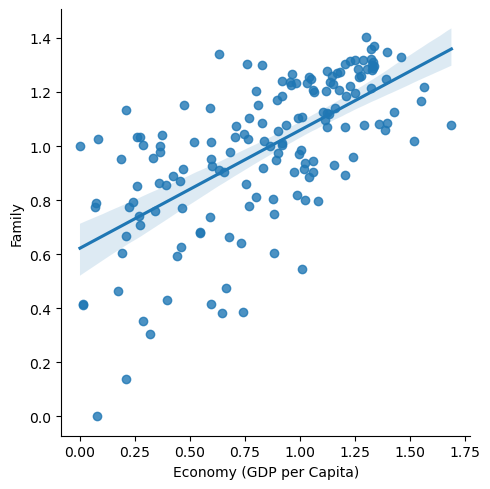

In [28]:
# Visualize rehationship between GDP per Capita vs Family
sns.lmplot(x='Economy (GDP per Capita)',y='Family',data=df)
plt.show()

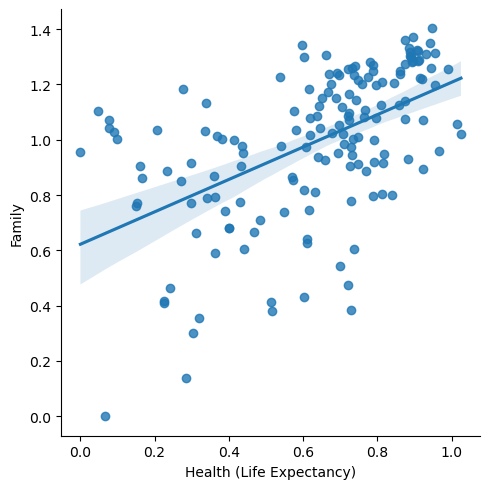

In [29]:
# Visualize rehationship between GDP per Capita vs Family
sns.lmplot(x='Health (Life Expectancy)',y='Family',data=df)
plt.show()

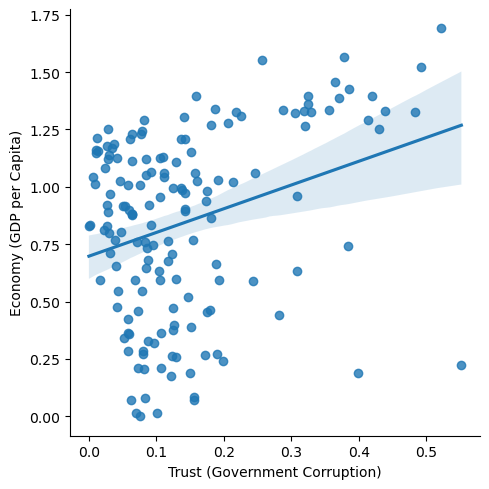

In [30]:
# Visualize rehationship between GDP per Capita vs Family
sns.lmplot(x='Trust (Government Corruption)',y='Economy (GDP per Capita)',data=df)
plt.show()

### Multivariate Analysis

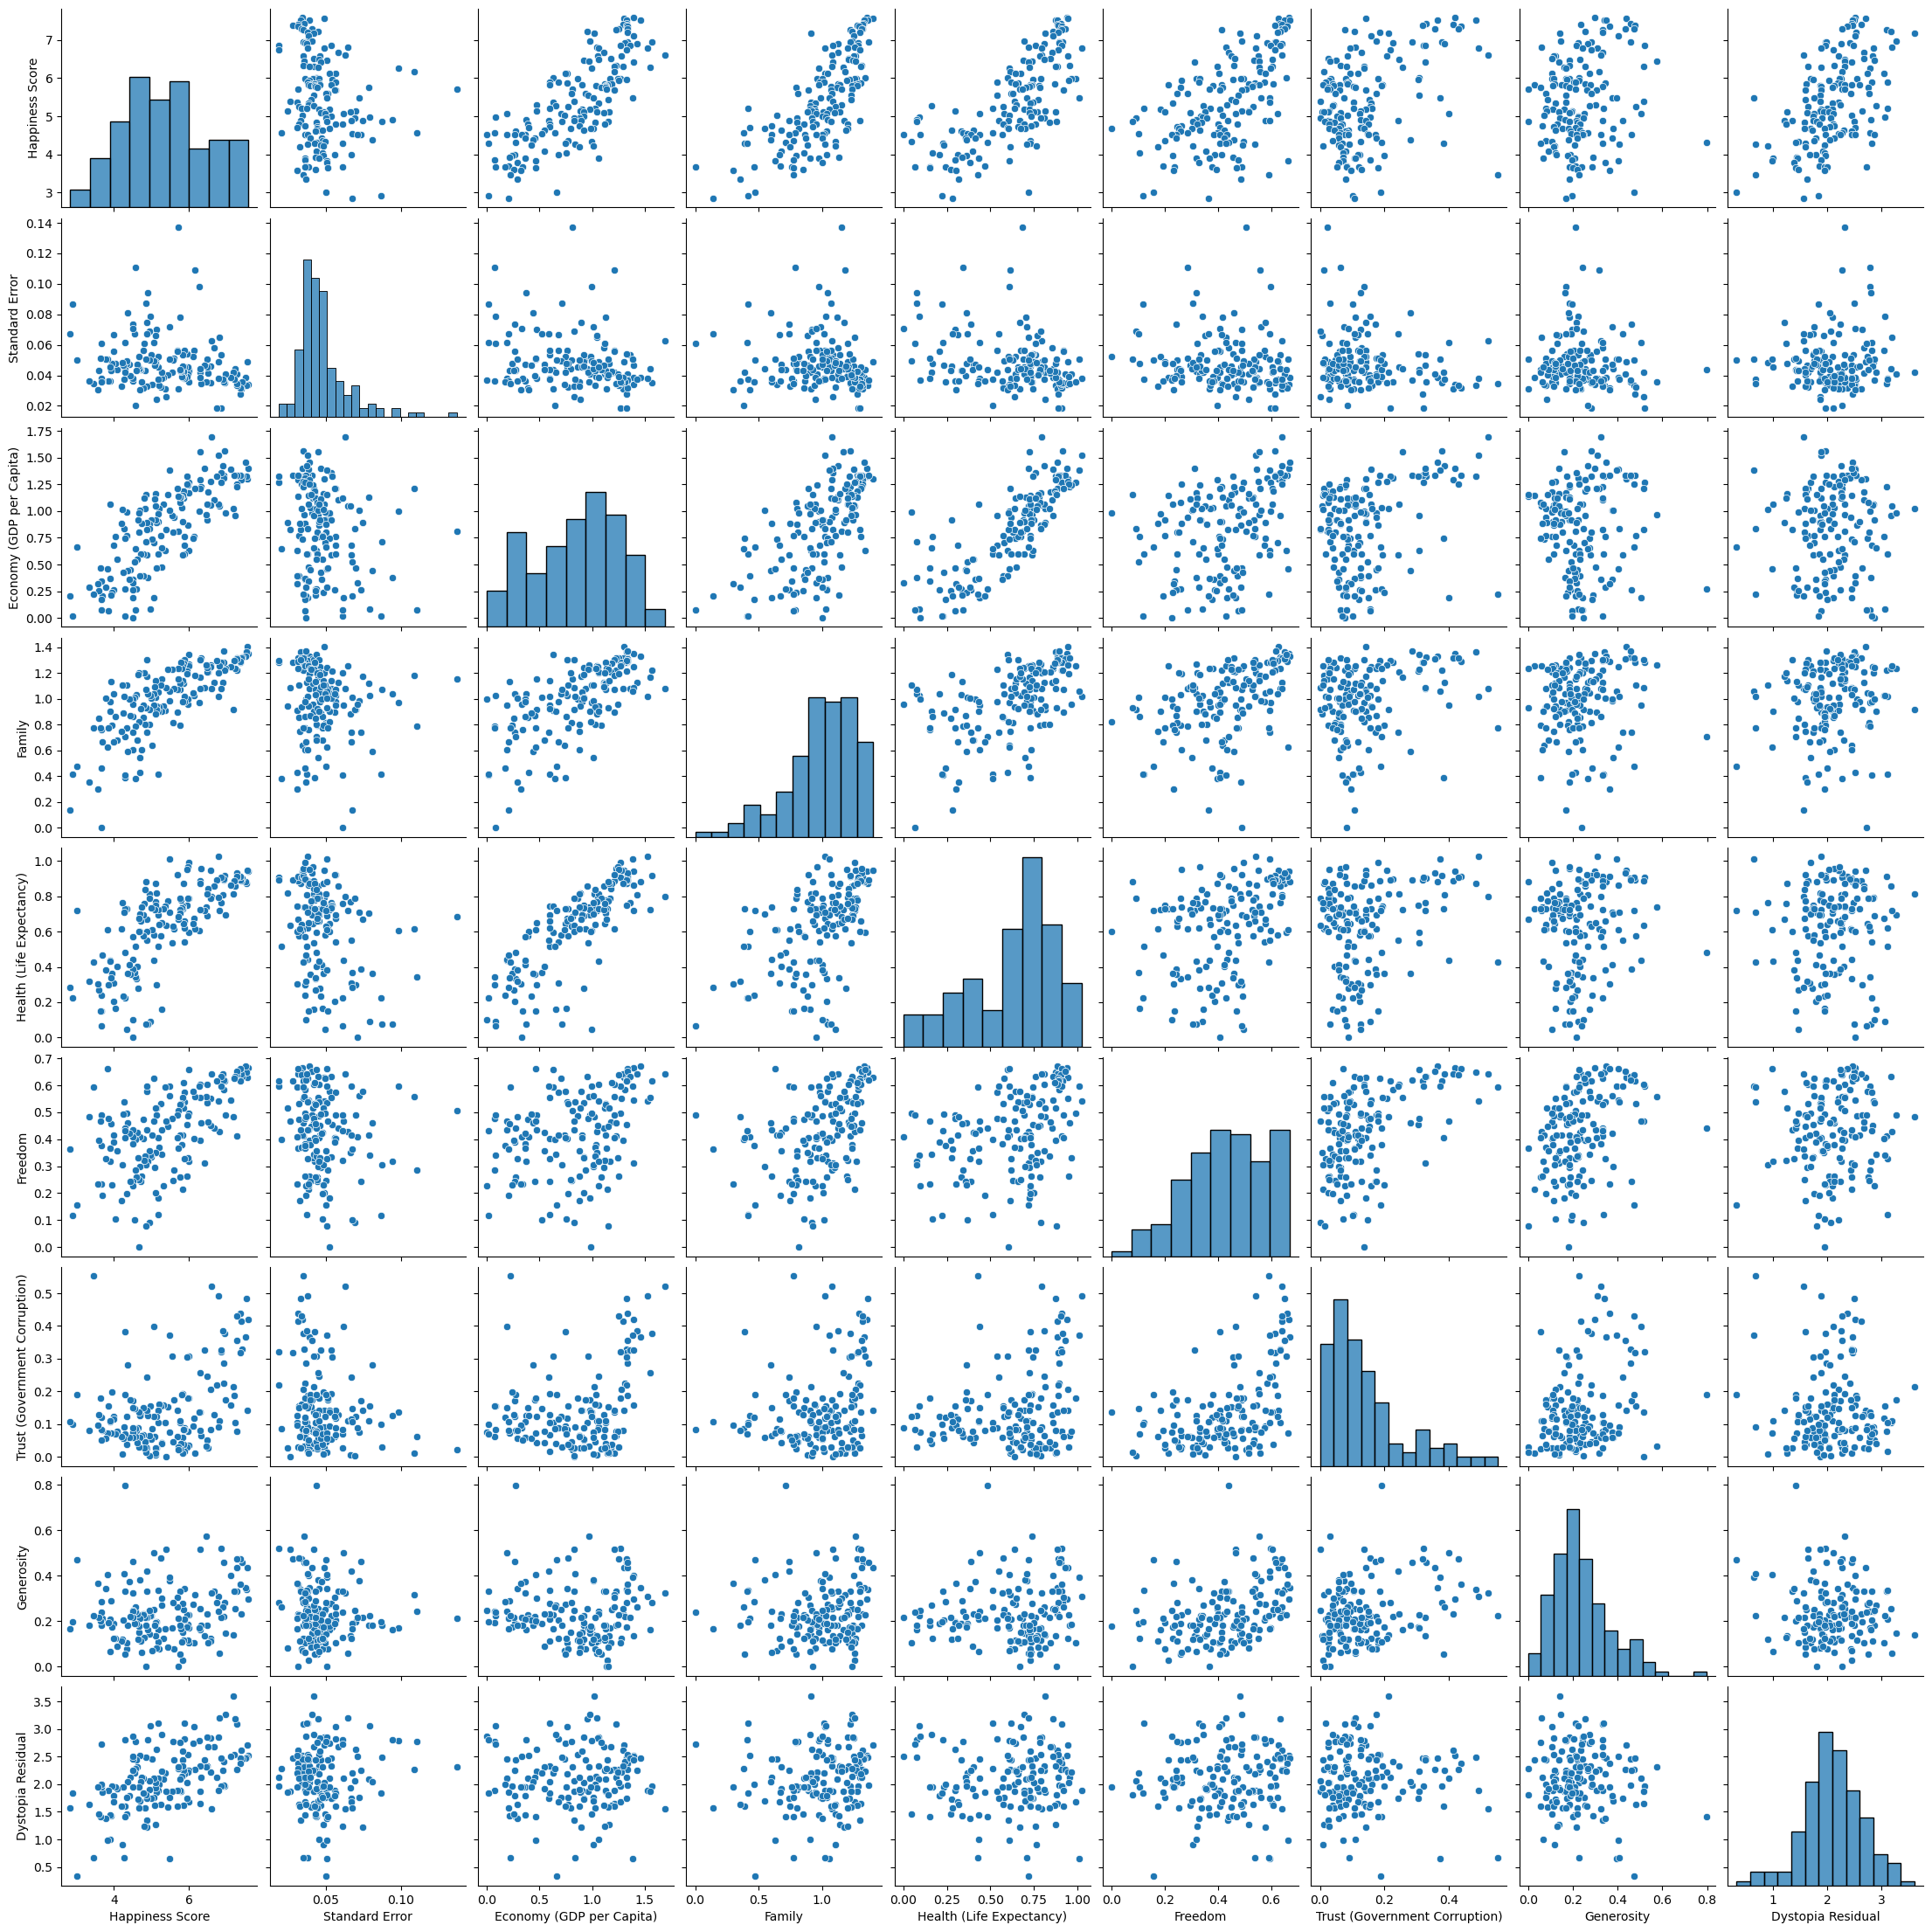

In [31]:
sns.pairplot(df)
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Happiness Score".

## Checking the outliers

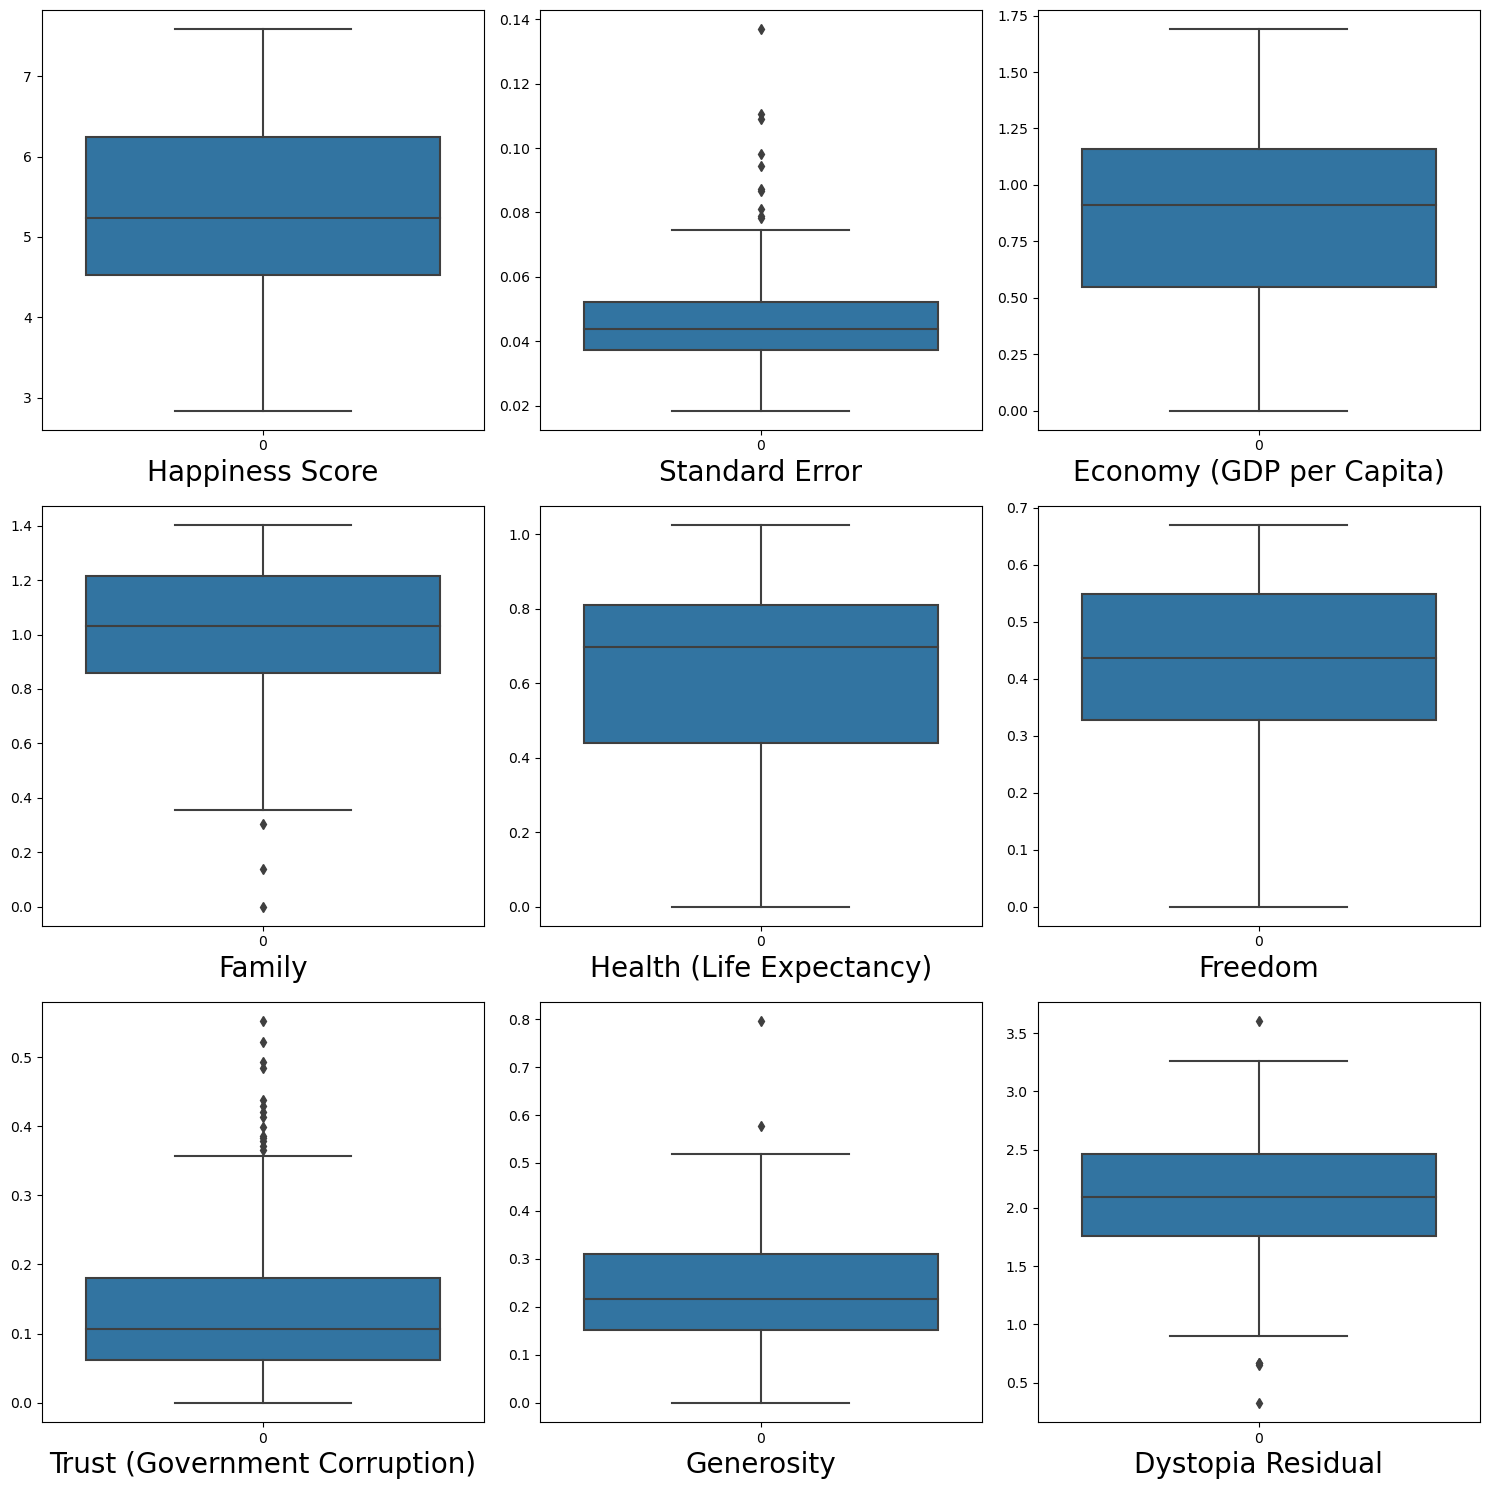

In [32]:
# Let's visualize the outliers using boxplot
plt.figure(figsize=(15,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

The columns Standard Error,Family,Government Corruption,Life Expectancy,Dystopia Residual has outliers. First we check the skewness.

## Checking for shewness

In [33]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that standard Error, Trust, Generosity are right skewed distribution. As we know Log transform is useful if and only if the distribution of the variable is right-skewed.A log transformation in a left-skewed distribution will tend to make it even more left skew. Family variable has left skewed distribution.

In [34]:
features = ['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']

In [35]:
# Removing skewness using yeo-johnson method
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
df[features] = scaler.fit_transform(df[features].values)

df[features].head()

,Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,-0.972226,1.669206,1.491765,1.773991,0.622391
1,0.309350,2.012132,1.532348,0.315993,1.480995
2,-1.062017,1.739586,1.085223,1.906792,0.927973
3,-0.503610,1.553118,1.147600,1.624007,0.964080
4,-0.823548,1.501726,1.270179,1.503484,1.592224


In [36]:
# checking skewness after applying yeo-johnson
df.skew()

Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

We can remove skewness on Standard Error columns and other columns it seems good behalf of domain knowledge.

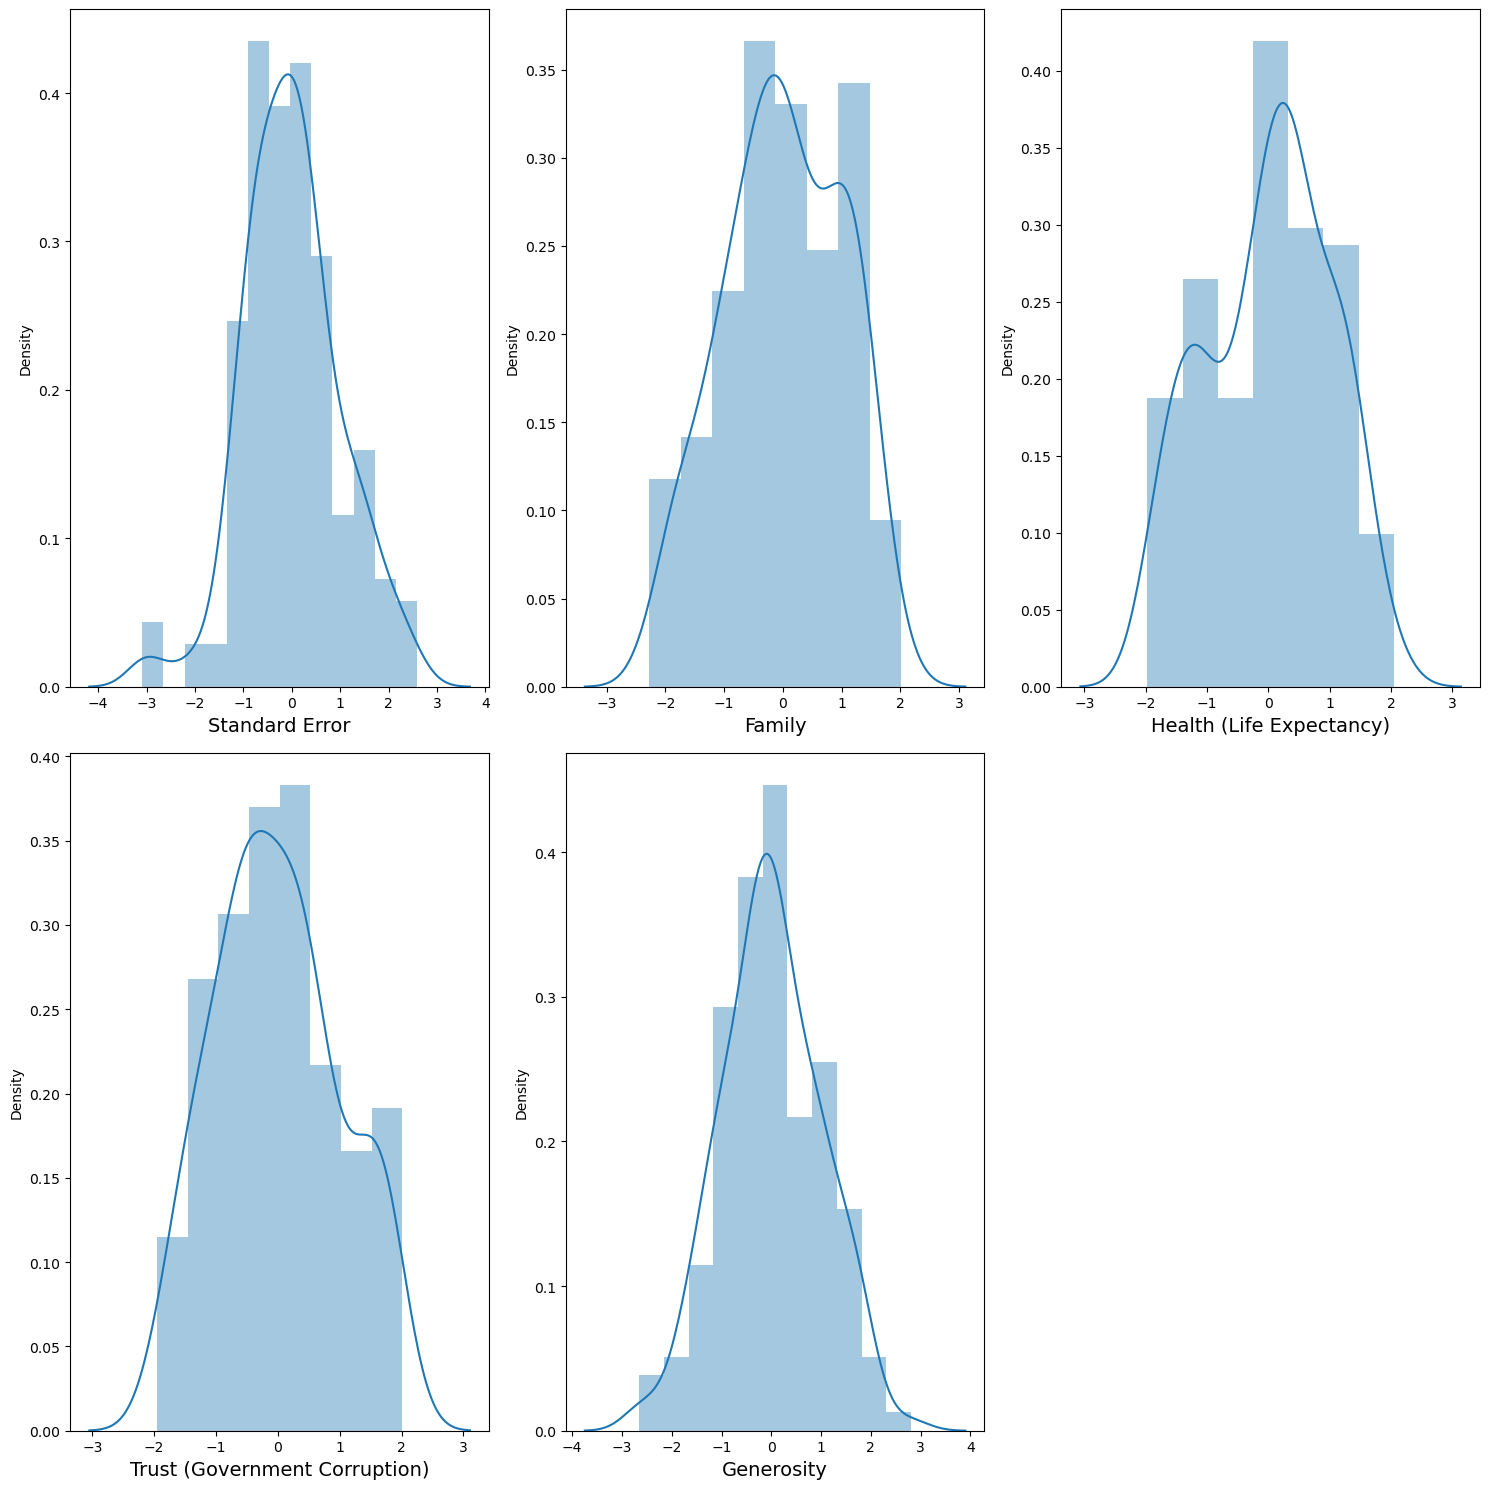

In [37]:
# Let's check how the data has been distributed in Standard Error columns after removing skewness
plt.figure(figsize=(15,15), facecolor='white')
plotnumber =1
for column in features:
    if plotnumber <=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

The skewness has been reduced in all column.

### Correlation between target and features variables.

In [38]:
# Checking the correlation between features and the target
corr = df.corr()

corr

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.222188,0.780966,0.773908,0.749896,0.568211,0.338561,0.178763,0.530474
Standard Error,-0.222188,1.000000,-0.221376,-0.189263,-0.318546,-0.186313,-0.156602,-0.100144,0.035111
Economy (GDP per Capita),0.780966,-0.221376,1.000000,0.662390,0.838278,0.370300,0.215532,-0.034839,0.040059
Family,0.773908,-0.189263,0.662390,1.000000,0.581167,0.502414,0.188079,0.126712,0.172593
Health (Life Expectancy),0.749896,-0.318546,0.838278,0.581167,1.000000,0.382351,0.187954,0.097270,0.036249
Freedom,0.568211,-0.186313,0.370300,0.502414,0.382351,1.000000,0.464543,0.395684,0.062783
Trust (Government Corruption),0.338561,-0.156602,0.215532,0.188079,0.187954,0.464543,1.000000,0.266287,0.010689
Generosity,0.178763,-0.100144,-0.034839,0.126712,0.097270,0.395684,0.266287,1.000000,-0.072491
Dystopia Residual,0.530474,0.035111,0.040059,0.172593,0.036249,0.062783,0.010689,-0.072491,1.000000


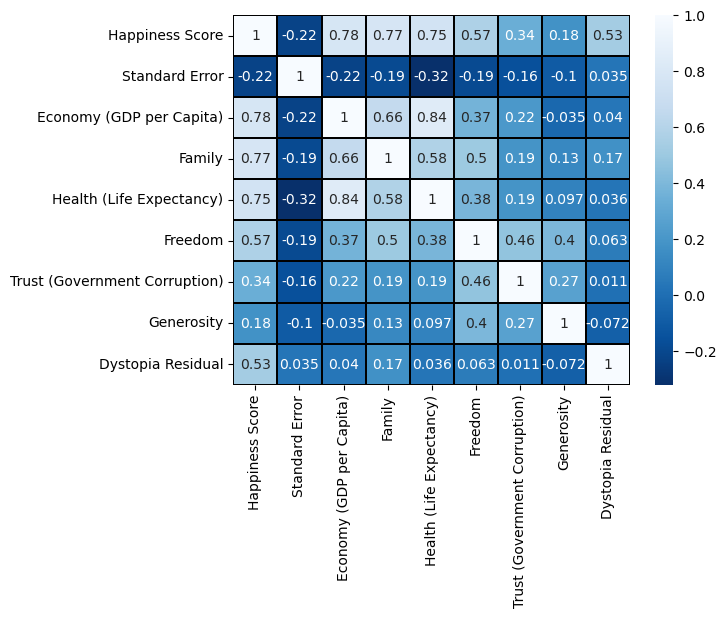

In [39]:
# Let's visualize the correlation matrix by ploting heatmap
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='black',cmap='Blues_r')
plt.show()

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature and feature to target.

This heatmap contains both postive and negative correlation

 1. The column Economy,Family,Health,Freedom,Dystopia  have positive correlation with the label column.
 2. The column Health and Economy has positive correlation.
 3. The column Freedom and Dystopia has positive correlation.
 4. The Halth and Family has positive correlation.

In [40]:
corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.773908
Health (Life Expectancy)         0.749896
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.338561
Generosity                       0.178763
Standard Error                  -0.222188
Name: Happiness Score, dtype: float64

### Visualizing the correlation between target and features using barplot

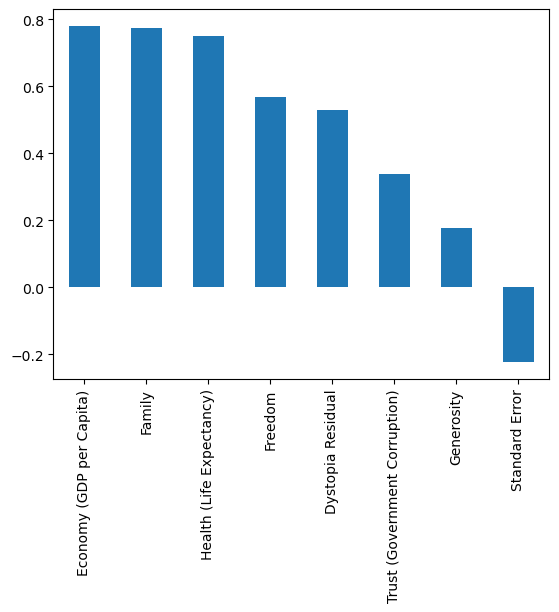

In [41]:
df.corr()['Happiness Score'].sort_values(ascending=False).drop('Happiness Score').plot(kind='bar')
plt.show()

For the above bar plot we can notice the positive and negative correlation between features and target. Here the features Standard Error have very less correlation with the column.

## Sparating feature and target

In [42]:
x = df.drop(columns=['Happiness Score'],axis=1)
y = df['Happiness Score']

### Feature Scaling using Standard Scalarization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x.values), columns = x.columns)

x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.972226,1.369621,1.669206,1.491765,1.577438,1.773991,0.622391,0.758258
1,0.309350,1.135226,2.012132,1.532348,1.332456,0.315993,1.480995,1.092857
2,-1.062017,1.192861,1.739586,1.085223,1.469659,1.906792,0.927973,0.712335
3,-0.503610,1.525130,1.553118,1.147600,1.605131,1.624007,0.964080,0.663893
4,-0.823548,1.194876,1.501726,1.270179,1.360416,1.503484,1.592224,0.639337
...,...,...,...,...,...,...,...,...
153,-0.916014,-1.552987,-0.959885,-0.939459,1.087740,2.012856,0.065304,-2.588925
154,-0.719479,-1.392303,-1.896644,-1.276496,0.372033,-0.433835,-0.334169,-0.843967
155,0.399137,-0.455245,-1.690664,0.262933,-1.809238,0.738915,1.659336,-3.208430
156,1.926902,-2.067566,-1.796803,-1.525700,-2.064472,-0.151946,-0.194829,-0.481985


## Checking Variance Inflation Factor (VIF)

In [44]:
# Find the variance inflation factor in each scaled column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,VIF,VIF values
0,Standard Error,1.142608
1,Economy (GDP per Capita),4.492101
2,Family,2.183693
3,Health (Life Expectancy),3.798399
4,Freedom,1.858966
5,Trust (Government Corruption),1.333014
6,Generosity,1.333072
7,Dystopia Residual,1.059688


By checking VIF values we cannot find any mutlicollineraity problem. We can now move ahead for model building.

# Modelling

In [59]:
# Import necessary libaraies use for model building

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, BaggingRegressor
import xgboost as xgb
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Find the best random state

In [46]:
# Find the best random state
maxAccu = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
    
print("Best accuracy is ", maxAccu,"at random_state", maxRS) 

Best accuracy is  0.9972903697946053 at random_state 204


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=maxRS)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (110, 8)
Training target vector size: (110,)
Test feature matrix size: (48, 8)
Test target vector size: (48,)


In [48]:
# Create a function to check r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_erro

def regressor(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)
    
    # Train the model
    model.fit(x_train,y_train)
    
    # Predict the model on train set
    train_pred = model.predict(x_train)
    
    # Predict the model on test set
    pred = model.predict(x_test)
    
    print('\033[1m'+'Error of ', model,'\033[0m')
    # Checking the r2_score on train set
    r2_train = r2_score(y_train,train_pred)
    print("R2_Score on training data :",r2_train)
    
    # Check the r2_score on test data
    r2_test = r2_score(y_test,pred)
    print("R2_Score on testing data  :",r2_test)
    
    # Checking Mean Absolute Error
    mae = mean_absolute_error(y_test,pred)
    print("\nMean Absolute Error       :",mae)
    
    # Checking Mean Squared Error
    mse = mean_squared_error(y_test,pred)
    print("Mean Squared Error        :",mse)
    
    # Checking Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print("Mean Squared Error        :",rmse)
    
    # Checking Cross Validation Score
    cv = (cross_val_score(model,x,y,cv=5))
    print("\nCross Validation Score    :",cv)
    print("Cross Validation Score    :",cv.mean())

    # Differet between R2 Score and Cross Validation Score
    print('\nDifference between R2_score and Cross Validaton Score\n',r2_test-cv.mean())
    print('\n')

In [49]:
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor()
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BCR = BaggingRegressor()
svr = SVR()

In [50]:
models = [LR,lasso,ridge,KNN,DT,RFR,ETR,GBR,ABR,BCR,svr]

model = 1
for i in models:
    if model<=12:
        regressor(i,x,y)
    model+=1

Error of  LinearRegression() 
R2_Score on training data : 0.9921893187555081
R2_Score on testing data  : 0.9972903697946053

Mean Absolute Error       : 0.04844671174787635
Mean Squared Error        : 0.0036433632373078077
Mean Squared Error        : 0.060360278638420875

Cross Validation Score    : [0.89894007 0.81521363 0.86292016 0.85565274 0.80197077]
Cross Validation Score    : 0.8469394734880208

Difference between R2_score and Cross Validaton Score
 0.1503508963065845


Error of  Lasso() 
R2_Score on training data : 0.0
R2_Score on testing data  : -0.017833402917306618

Mean Absolute Error       : 0.9887787878787879
Mean Squared Error        : 1.3685767137190077
Mean Squared Error        : 1.1698618353117636

Cross Validation Score    : [-39.5383371  -12.7569766   -0.15102258 -30.73906532 -23.65659767]
Cross Validation Score    : -21.368399851943106

Difference between R2_score and Cross Validaton Score
 21.3505664490258


Error of  Ridge() 
R2_Score on training data : 0.9921558

From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that Ridge Regression as out best fitting and best performing model.

### Ridge Regression is out best model.

**Ridge Regression is out best model. It accuracy is almost 84%. So, we do not need to use hyperparameter turning.**

## Ridge Regularization

In [143]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),cv=10,gcv_mode='auto')
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        cv=10, gcv_mode='auto')

In [144]:
ridgecv.alpha_

0.09099999999999998

R2_score                : 99.72886765413934
Mean Absolute Error     : 0.04840074559858761
Mean Squared Error      : 0.003645639982116459
Root Mean Squared Error : 0.06037913532103999


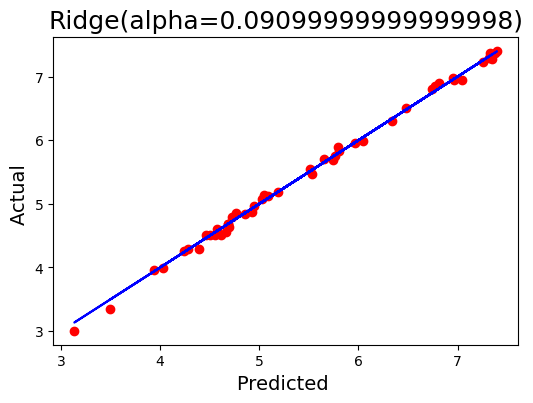

In [145]:
# Instantiate RidgeRegression 

Model =  Ridge(alpha = ridgecv.alpha_)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score                :',r2_score(y_test,pred)*100)
print('Mean Absolute Error     :',mean_absolute_error(y_test,pred))
print('Mean Squared Error      :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

# visualize actual predict or model predict
plt.figure(figsize=(6,4))
plt.scatter(x=pred, y=y_test,color='r')
plt.plot(pred, pred, color = 'b')
plt.xlabel('Predicted ',fontsize=14)
plt.ylabel('Actual ', fontsize=14)
plt.title(Model,fontsize=18)
plt.show()

In [148]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

## Tune the parameter with Ridge Regression

In [146]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.arange(0.001,0.50,0.10),
         'fit_intercept': np.arange(1,10,5),
         'max_iter': np.arange(1,10,5),
         'positive': np.arange(1,10,5),
         'solver':['sag', 'saga', 'svd', 'auto', 'lsqr', 'sparse_cg', 'lbfgs', 'cholesky'],
         }


# Train the model for best parameters
GCV = GridSearchCV(ridge,params,cv=5)
GCV.fit(x_train,y_train)

print('Best Score     -->',(GCV.best_score_))

print('Best Parameter -->',(GCV.best_estimator_))

Best Score     --> 0.9887117798566643
Best Parameter --> Ridge(alpha=0.401, fit_intercept=1, max_iter=6, positive=1)


R2_score                : 99.71895755060076
Mean Absolute Error     : 0.04708849460752787
Mean Squared Error      : 0.0037788910317929475
Root Mean Squared Error : 0.06147268524957201


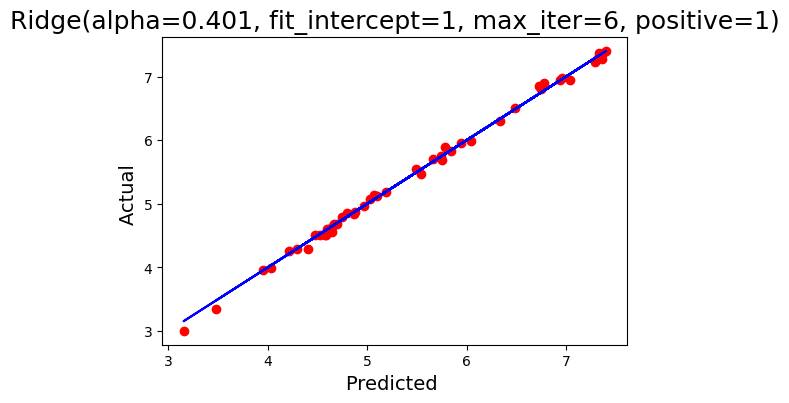

In [147]:
# Instantiate RidgeRegression 

Model =  Ridge(alpha=0.401, fit_intercept=1, max_iter=6, positive=1)

Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score                :',r2_score(y_test,pred)*100)
print('Mean Absolute Error     :',mean_absolute_error(y_test,pred))
print('Mean Squared Error      :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

# visualize actual predict or model predict
plt.figure(figsize=(6,4))
plt.scatter(x=pred, y=y_test,color='r')
plt.plot(pred, pred, color = 'b')
plt.xlabel('Predicted ',fontsize=14)
plt.ylabel('Actual ', fontsize=14)
plt.title(Model,fontsize=18)
plt.show()

**All RidgeCV and Tuning Ridge are almost same score. So we use GridSearch parameter.**

### Saving the model

In [52]:
# Saving the model using .pkl
import joblib
joblib.dump(Model,"World Happiness Report Project.pkl")

['World Happiness Report Project.pkl']

### Predict the model

In [53]:
# Let's load the saved model and get the predictions
loaded_model = joblib.load(open('World Happiness Report Project.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

99.72903697946053


In [54]:
# Prediction 
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,6.737266,4.767108,7.257965,4.683057,4.931792,5.650143,5.759953,5.528093,6.957353,6.96384,...,5.792391,7.376786,7.397688,6.482075,6.339819,5.80616,3.133524,4.577641,4.27729,4.557288
Original,6.798000,4.857000,7.226000,4.681000,4.867000,5.709000,5.754000,5.474000,6.983000,6.94600,...,5.890000,7.378000,7.406000,6.505000,6.298000,5.82800,3.006000,4.610000,4.29700,4.517000
